<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/lab_2_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [ ]:
# !pip install wandb
# !pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:


Abort: 

In [5]:
import math
import os
import random
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision import transforms, datasets
from tqdm import tqdm

# You may add any imports you need

In [6]:
try:
    import wandb
    WANDB_AVAILABLE = True
except ImportError:
    WANDB_AVAILABLE = False

# Функция для фиксации seed
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(123456)

In [7]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2025-02-21 21:11:40--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ed781r6u2d8de61xxhcq6/dataset.zip?rlkey=vkvp4kdp03m42ceprg95cg0ax&dl=1 [following]
--2025-02-21 21:11:40--  https://www.dropbox.com/scl/fi/ed781r6u2d8de61xxhcq6/dataset.zip?rlkey=vkvp4kdp03m42ceprg95cg0ax&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44271a41a5e7f49d7c4b8c14c8.dl.dropboxusercontent.com/cd/0/inline/CkmbBCPADHmQqCSB22tzHQJVpNNFmxCmkXbo8di0xQrAFuCwXS59ai9ItLZcG2F5s_JQp12CdD87UrMqnUKlFqveXWeyM_BA8e8dtGROiNM7ZZqnvtoAw4oiySD9bcA0KAw/file?dl=1# [following]
--2025-02-21 21:11:41--  https://uc44271a41a5e7f49d7c4b8c14c8.dl.dropboxusercontent.com/cd/0/inline/Ckmb

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Пути к данным. Если данные распакованы в папку /content/dataset/dataset, замените путь при необходимости.
train_dir = '/content/dataset/dataset/train'
val_dir   = '/content/dataset/dataset/val'

# Создаём датасеты
train_dataset = ImageFolder(train_dir, transform=train_transform)
val_dataset   = ImageFolder(val_dir, transform=val_transform)

In [9]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("Data tests passed")

# Создаём DataLoader
batch_size = 64
num_workers = 2  # Для Colab обычно num_workers=2-4, можно уменьшить при возникновении проблем
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

Data tests passed


### Посмотрим на картиночки

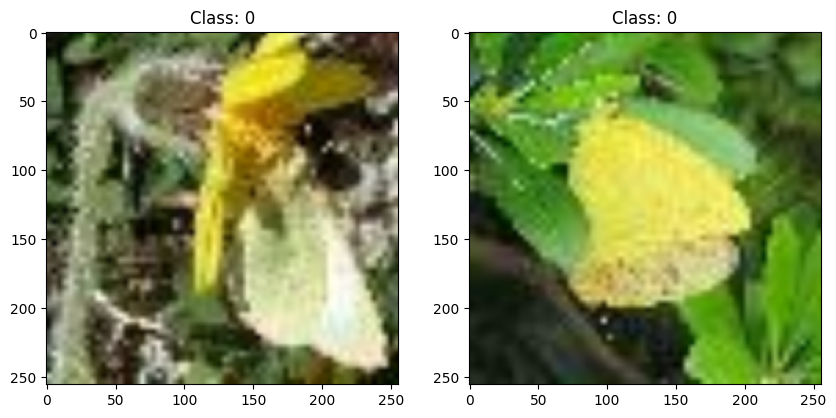

In [10]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.imshow(images[5].permute(1, 2, 0).cpu().numpy() * np.array(std) + np.array(mean))
    plt.title(f"Class: {class_nums[5]}")
    plt.subplot(1,2,2)
    plt.imshow(images[19].permute(1, 2, 0).cpu().numpy() * np.array(std) + np.array(mean))
    plt.title(f"Class: {class_nums[19]}")
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [23]:
class YourNet(nn.Module):
    def __init__(self, num_classes=10):
        """
        Архитектура:
        3 блока: каждый содержит 2 свёрточных слоя с BatchNorm+ReLU и max pooling.
        Последний блок – завершается адаптивным усреднением до 1x1 и финальным линейным слоем.
        """
        super(YourNet, self).__init__()
        self.features = nn.Sequential(
            # Блок 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),  # уменьшает размер вдвое

            # Блок 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),

            # Блок 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # независимо от исходного размера
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, num_classes)
        )
        # Внутренние переменные для накопления метрики (если потребуется)
        self._correct = 0
        self._total = 0

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

    def get_accuracy(self, reset=False):
        """Возвращает накопленную точность. Если reset=True – сбрасываем подсчёт."""
        acc = self._correct / self._total if self._total > 0 else 0.0
        if reset:
            self._correct = 0
            self._total = 0
        return acc

    def update_accuracy(self, outputs, target):
        """Обновляем счётчик точности для батча."""
        _, preds = torch.max(outputs, 1)
        correct = torch.sum(preds == target).item()
        self._correct += correct
        self._total += target.size(0)


### Тренировочный класс lightning

In [24]:
# Обучающая петля (без pytorch_lightning)
def train_model(model, train_loader, val_loader, num_epochs, device, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        # Итерация по обучающей выборке
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} — Training"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels).item()
            train_total += labels.size(0)

        train_acc = train_correct / train_total

        # Валидация
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} — Validation"):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels).item()
                val_total += labels.size(0)
        val_acc = val_correct / val_total

        # Сохраняем лучшую модель по валидации
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.4f} || "
              f"Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.4f}")

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
    # Загружаем лучшую модель
    model.load_state_dict(torch.load("best_model.pth"))
    return model

### Валидация результатов задания

In [25]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_acc = 0.0
    with torch.no_grad():
        # Для каждого батча считаем индивидуальную точность и суммируем
        for images, labels in tqdm(test_dataloader, desc="Evaluation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            batch_acc = (preds == labels).sum().item() / labels.size(0)
            total_acc += batch_acc
    return total_acc / len(test_dataloader)

In [47]:
# Основной блок: подготовка данных, аугментация, запуск обучения
def main():
    # Гиперпараметры
    batch_size = 64
    num_epochs = 20     # можно увеличить число эпох для повышения точности
    learning_rate = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Аугментация для обучающей выборки, без изменения размера изображений
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # Случайное обрезание. Если изображения небольшие (например, 32x32 как в CIFAR-10),
        # используется RandomCrop с небольшой паддинг – это не ресайз!
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    # Для валидации – только нормализация
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # В данном примере используется CIFAR-10, замените датасет, если требуется.
    train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
    val_dataset   = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Инициализация модели
    model = YourNet(num_classes=10).to(device)

    # Обучение
    model = train_model(model, train_loader, val_loader, num_epochs, device, learning_rate)

    # Оценка результата (аналог evaluate_task из задания)
    val_accuracy = evaluate_task(model, val_loader, device)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Подсчёт баллов по схеме: если accuracy не менее 0.44, то 10 * accuracy / 0.44 (ограничено сверху 10 баллами)
    score = np.clip(10 * val_accuracy / 0.44, 0, 10)
    print(f"Оценка за это задание составит {score:.2f} баллов")

if __name__ == "__main__":
    # Создаём папку для сохранения модели, если её ещё нет
    if not os.path.exists("./data"):
        os.makedirs("./data")
    main()

100%|██████████| 170M/170M [00:01<00:00, 105MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Epoch 1/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.61it/s]


Epoch [1/20] Train Loss: 1.2937 | Train Acc: 0.5315 || Val Loss: 1.3766 | Val Acc: 0.5314


Epoch 2/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.51it/s]


Epoch [2/20] Train Loss: 0.8855 | Train Acc: 0.6877 || Val Loss: 0.9130 | Val Acc: 0.6922


Epoch 3/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.52it/s]


Epoch [3/20] Train Loss: 0.7316 | Train Acc: 0.7453 || Val Loss: 0.7923 | Val Acc: 0.7315


Epoch 4/20 — Validation: 100%|██████████| 157/157 [00:29<00:00,  5.34it/s]


Epoch [4/20] Train Loss: 0.6448 | Train Acc: 0.7772 || Val Loss: 0.6570 | Val Acc: 0.7785


Epoch 5/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.48it/s]


Epoch [5/20] Train Loss: 0.5853 | Train Acc: 0.7988 || Val Loss: 0.6983 | Val Acc: 0.7740


Epoch 6/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.53it/s]


Epoch [6/20] Train Loss: 0.5442 | Train Acc: 0.8106 || Val Loss: 0.5727 | Val Acc: 0.8040


Epoch 7/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.62it/s]


Epoch [7/20] Train Loss: 0.5101 | Train Acc: 0.8243 || Val Loss: 0.6272 | Val Acc: 0.7931


Epoch 8/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.51it/s]


Epoch [8/20] Train Loss: 0.4788 | Train Acc: 0.8358 || Val Loss: 0.5433 | Val Acc: 0.8178


Epoch 9/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.78it/s]


Epoch [9/20] Train Loss: 0.4517 | Train Acc: 0.8453 || Val Loss: 0.6956 | Val Acc: 0.7855


Epoch 10/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.54it/s]


Epoch [10/20] Train Loss: 0.4290 | Train Acc: 0.8515 || Val Loss: 0.5800 | Val Acc: 0.8169


Epoch 11/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.62it/s]


Epoch [11/20] Train Loss: 0.4099 | Train Acc: 0.8583 || Val Loss: 0.5046 | Val Acc: 0.8334


Epoch 12/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.73it/s]


Epoch [12/20] Train Loss: 0.3953 | Train Acc: 0.8653 || Val Loss: 0.5264 | Val Acc: 0.8298


Epoch 13/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.53it/s]


Epoch [13/20] Train Loss: 0.3808 | Train Acc: 0.8677 || Val Loss: 0.4847 | Val Acc: 0.8404


Epoch 14/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.50it/s]


Epoch [14/20] Train Loss: 0.3636 | Train Acc: 0.8747 || Val Loss: 0.4783 | Val Acc: 0.8421


Epoch 15/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.69it/s]


Epoch [15/20] Train Loss: 0.3555 | Train Acc: 0.8753 || Val Loss: 0.5024 | Val Acc: 0.8345


Epoch 16/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.34it/s]


Epoch [16/20] Train Loss: 0.3427 | Train Acc: 0.8802 || Val Loss: 0.4627 | Val Acc: 0.8518


Epoch 17/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.49it/s]


Epoch [17/20] Train Loss: 0.3300 | Train Acc: 0.8852 || Val Loss: 0.4614 | Val Acc: 0.8513


Epoch 18/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.38it/s]


Epoch [18/20] Train Loss: 0.3220 | Train Acc: 0.8886 || Val Loss: 0.5057 | Val Acc: 0.8426


Epoch 19/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.39it/s]


Epoch [19/20] Train Loss: 0.3125 | Train Acc: 0.8924 || Val Loss: 0.4567 | Val Acc: 0.8570


Epoch 20/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.39it/s]
<ipython-input-45-f29f0e9c4595>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_stat

Epoch [20/20] Train Loss: 0.3062 | Train Acc: 0.8941 || Val Loss: 0.4981 | Val Acc: 0.8455
Best Validation Accuracy: 0.8570


Evaluation: 100%|██████████| 157/157 [00:24<00:00,  6.41it/s]

Validation Accuracy: 0.8574
Оценка за это задание составит 10.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [26]:
# Основной блок: подготовка данных, аугментация, запуск обучения
def main():
    # Гиперпараметры
    batch_size = 64
    num_epochs = 20     # можно увеличить число эпох для повышения точности
    learning_rate = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Аугментация для обучающей выборки, без изменения размера изображений
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # Случайное обрезание. Если изображения небольшие (например, 32x32 как в CIFAR-10),
        # используется RandomCrop с небольшой паддинг – это не ресайз!
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    # Для валидации – только нормализация
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # В данном примере используется CIFAR-10, замените датасет, если требуется.
    train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
    val_dataset   = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Инициализация модели
    model = YourNet(num_classes=10).to(device)

    # Обучение
    model = train_model(model, train_loader, val_loader, num_epochs, device, learning_rate)

    # Оценка результата (аналог evaluate_task из задания)
    val_accuracy = evaluate_task(model, val_loader, device)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Подсчёт баллов по схеме: если accuracy не менее 0.5, то 10 * (accuracy - 0.5) / 0.34 (ограничено сверху 10 баллами)
    score = np.clip(10 * (val_accuracy - 0.5) / 0.34, 0, 10)
    print(f"Оценка за это задание составит {score:.2f} баллов")

if __name__ == "__main__":
    # Создаём папку для сохранения модели, если её ещё нет
    if not os.path.exists("./data"):
        os.makedirs("./data")
    main()

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.50it/s]


Epoch [1/20] Train Loss: 1.3055 | Train Acc: 0.5242 || Val Loss: 1.0915 | Val Acc: 0.6102


Epoch 2/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.46it/s]


Epoch [2/20] Train Loss: 0.8951 | Train Acc: 0.6839 || Val Loss: 0.8822 | Val Acc: 0.6928


Epoch 3/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.49it/s]


Epoch [3/20] Train Loss: 0.7368 | Train Acc: 0.7412 || Val Loss: 0.8072 | Val Acc: 0.7267


Epoch 4/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.49it/s]


Epoch [4/20] Train Loss: 0.6517 | Train Acc: 0.7737 || Val Loss: 0.6741 | Val Acc: 0.7749


Epoch 5/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.47it/s]


Epoch [5/20] Train Loss: 0.5877 | Train Acc: 0.7959 || Val Loss: 0.6542 | Val Acc: 0.7783


Epoch 6/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.67it/s]


Epoch [6/20] Train Loss: 0.5398 | Train Acc: 0.8147 || Val Loss: 0.6920 | Val Acc: 0.7707


Epoch 7/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.43it/s]


Epoch [7/20] Train Loss: 0.5067 | Train Acc: 0.8263 || Val Loss: 0.5749 | Val Acc: 0.8053


Epoch 8/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.59it/s]


Epoch [8/20] Train Loss: 0.4783 | Train Acc: 0.8359 || Val Loss: 0.5174 | Val Acc: 0.8245


Epoch 9/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.45it/s]


Epoch [9/20] Train Loss: 0.4555 | Train Acc: 0.8423 || Val Loss: 0.5615 | Val Acc: 0.8101


Epoch 10/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.49it/s]


Epoch [10/20] Train Loss: 0.4321 | Train Acc: 0.8522 || Val Loss: 0.4476 | Val Acc: 0.8466


Epoch 11/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.44it/s]


Epoch [11/20] Train Loss: 0.4107 | Train Acc: 0.8591 || Val Loss: 0.5383 | Val Acc: 0.8262


Epoch 12/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.47it/s]


Epoch [12/20] Train Loss: 0.3962 | Train Acc: 0.8638 || Val Loss: 0.4852 | Val Acc: 0.8406


Epoch 13/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.70it/s]


Epoch [13/20] Train Loss: 0.3836 | Train Acc: 0.8678 || Val Loss: 0.5170 | Val Acc: 0.8337


Epoch 14/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.48it/s]


Epoch [14/20] Train Loss: 0.3700 | Train Acc: 0.8723 || Val Loss: 0.4716 | Val Acc: 0.8488


Epoch 15/20 — Validation: 100%|██████████| 157/157 [00:23<00:00,  6.56it/s]


Epoch [15/20] Train Loss: 0.3560 | Train Acc: 0.8771 || Val Loss: 0.5076 | Val Acc: 0.8296


Epoch 16/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.46it/s]


Epoch [16/20] Train Loss: 0.3413 | Train Acc: 0.8806 || Val Loss: 0.4610 | Val Acc: 0.8515


Epoch 17/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.43it/s]


Epoch [17/20] Train Loss: 0.3333 | Train Acc: 0.8832 || Val Loss: 0.4557 | Val Acc: 0.8521


Epoch 18/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.50it/s]


Epoch [18/20] Train Loss: 0.3239 | Train Acc: 0.8870 || Val Loss: 0.4222 | Val Acc: 0.8650


Epoch 19/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.44it/s]


Epoch [19/20] Train Loss: 0.3138 | Train Acc: 0.8903 || Val Loss: 0.4466 | Val Acc: 0.8558


Epoch 20/20 — Validation: 100%|██████████| 157/157 [00:24<00:00,  6.47it/s]
<ipython-input-24-f29f0e9c4595>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_stat

Epoch [20/20] Train Loss: 0.3063 | Train Acc: 0.8924 || Val Loss: 0.4636 | Val Acc: 0.8521
Best Validation Accuracy: 0.8650


Evaluation: 100%|██████████| 157/157 [00:24<00:00,  6.48it/s]

Validation Accuracy: 0.8647
Оценка за это задание составит 10.00 баллов


### Тренировочный класс lightning

### Валидация результатов задания

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.